In [9]:
%matplotlib inline
import math
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib3
import joblib
import random
import matplotlib
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging
import pandas as pd
from sompy.sompy import SOMFactory
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [10]:
data = pd.read_csv('alldata.csv')
data

,N,P,K,pH,EC,Moisture,Temp,Lat,Long
0,226,570,566,7.3,1296.9,49.0,30.30,-7.196630,112.530098
1,435,1050,1046,7.6,2247.3,64.0,30.82,-7.196627,112.530129
2,266,665,664,7.8,1476.8,75.0,29.70,-7.196629,112.53016
3,199,505,500,8.3,1130.7,60.0,29.15,-7.196632,112.530185
4,248,615,563,8.1,1358.4,68.0,28.90,-7.196634,112.530217
...,...,...,...,...,...,...,...,...,...
95,6,60,53,5.3,214.0,13.0,29.60,-7.286581,112.584425
96,5,58,50,5.5,210.0,12.4,29.80,-7.286588,112.584432
97,6,60,53,5.2,215.0,12.4,30.00,-7.286554,112.584479
98,6,61,54,5.3,217.0,13.3,30.50,-7.286614,112.584448


In [11]:
df = pd.read_csv("alldata.csv")
df = df[["N", "P", "K", "pH", "EC", "Moisture", "Temp"]]

# Data normalization
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)
normalized_df = pd.DataFrame(data_normalized, columns=df.columns)
print(normalized_df)

           N         P         K        pH        EC  Moisture      Temp
0   0.939244  0.909616  0.916016  0.132562  1.002460 -0.102802 -0.163106
1   2.975571  2.885254  2.888860  0.350353  2.902657  0.006663 -0.147052
2   1.328971  1.300628  1.318805  0.495548  1.362146  0.086937 -0.181630
3   0.676178  0.642082  0.644750  0.858533  0.670166 -0.022528 -0.198610
4   1.153594  1.094832  0.903686  0.713339  1.125421  0.035853 -0.206328
..       ...       ...       ...       ...       ...       ...       ...
95 -1.204259 -1.189498 -1.192461 -1.319379 -1.162653 -0.365516 -0.184717
96 -1.214002 -1.197730 -1.204791 -1.174185 -1.170650 -0.369894 -0.178542
97 -1.204259 -1.189498 -1.192461 -1.391976 -1.160653 -0.369894 -0.172368
98 -1.204259 -1.185383 -1.188351 -1.319379 -1.156654 -0.363326 -0.156932
99  1.085392  1.049557  1.059869 -0.811200  1.098630 -0.069232 -0.113710

[100 rows x 7 columns]


In [12]:
# Training SOMS
som = SOMFactory().build(data_normalized, initialization='pca', component_names=df.columns.tolist())
som.train(n_job=-1, verbose=False, train_rough_len=10, train_finetune_len=10)

In [13]:
total_quant_error = 0
for epoch in range(10):
    # Adjust the verbose level for printing at each iteration
    verbose_level = 'info'

    # Adjust training length
    train_rough_len = 10
    train_finetune_len = 10

    # Training SOM
    som.train(n_job=1, verbose=verbose_level, train_rough_len=train_rough_len, train_finetune_len=train_finetune_len)
    
    # Evaluate and print quantization error
    quant_error = som.calculate_quantization_error()
    print(f"Iterasi {epoch + 1}: Kesalahan Kuantisasi = {quant_error}")
    
    # Quantization error accumulation
    total_quant_error += quant_error

# Calculate average quantization error
average_quant_error = total_quant_error / 10
print(f"Rata-Rata Kesalahan Kuantisasi Secara Keseluruhan: {average_quant_error}")

 Training...
 pca_linear_initialization took: 0.008000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.014000, quantization error: 1.062580

 epoch: 2 ---> elapsed time:  0.011000, quantization error: 1.344475

 epoch: 3 ---> elapsed time:  0.031000, quantization error: 0.988804

 epoch: 4 ---> elapsed time:  0.009000, quantization error: 0.892303

 epoch: 5 ---> elapsed time:  0.023000, quantization error: 0.846471

 epoch: 6 ---> elapsed time:  0.036000, quantization error: 0.806576

 epoch: 7 ---> elapsed time:  0.036000, quantization error: 0.764481

 epoch: 8 ---> elapsed time:  0.022000, quantization error: 0.725365

 epoch: 9 ---> elapsed time:  0.023000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.243000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.071000, quantization error: 0.567109

 

Iterasi 1: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 9 ---> elapsed time:  0.040000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.042000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.042000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.027000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.020000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.022000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.023000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.042000, quantization error: 0.541024

 epoch: 7 ---> elapsed time:  0.033000, quantization error: 0.541024

 epoch: 8 ---> elapsed time:  0.066000, quantization error: 0.541024

 epoch: 9 ---> elapsed time:  0.030000, quantization error: 0.541024

 epoch: 10 ---> elapsed time:  0.034000, quantization error: 0.541024

 Final quantization error: 0.541024
 train took: 0.829000 seconds
 Trainin

Iterasi 2: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 4 ---> elapsed time:  0.116000, quantization error: 0.892303

 epoch: 5 ---> elapsed time:  0.029000, quantization error: 0.846471

 epoch: 6 ---> elapsed time:  0.016000, quantization error: 0.806576

 epoch: 7 ---> elapsed time:  0.012000, quantization error: 0.764481

 epoch: 8 ---> elapsed time:  0.017000, quantization error: 0.725365

 epoch: 9 ---> elapsed time:  0.018000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.013000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.013000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.012000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.011000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.012000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.015000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.013000, quantization error: 0.541024

 epoc

Iterasi 3: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 10 ---> elapsed time:  0.015000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.036000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.021000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.071000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.022000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.018000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.012000, quantization error: 0.541024

 epoch: 7 ---> elapsed time:  0.012000, quantization error: 0.541024

 epoch: 8 ---> elapsed time:  0.012000, quantization error: 0.541024

 epoch: 9 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoch: 10 ---> elapsed time:  0.010000, quantization error: 0.541024

 Final quantization error: 0.541024
 train took: 0.528000 seconds
 Training...
 pca_linear_initialization took: 0.007000 seconds
 Rough training

Iterasi 4: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 2 ---> elapsed time:  0.017000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.017000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.016000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.019000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.017000, quantization error: 0.541024

 epoch: 7 ---> elapsed time:  0.015000, quantization error: 0.541024

 epoch: 8 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoch: 9 ---> elapsed time:  0.015000, quantization error: 0.541024

 epoch: 10 ---> elapsed time:  0.013000, quantization error: 0.541024

 Final quantization error: 0.541024
 train took: 0.385000 seconds
 Training...
 pca_linear_initialization took: 0.012000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.031000, quantization error: 1.062580

 epoch: 2 ---> elapsed time:  0.032000, quantization error: 1.344475

 epoch: 3 ---> elap

Iterasi 5: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 6 ---> elapsed time:  0.025000, quantization error: 0.806576

 epoch: 7 ---> elapsed time:  0.019000, quantization error: 0.764481

 epoch: 8 ---> elapsed time:  0.011000, quantization error: 0.725365

 epoch: 9 ---> elapsed time:  0.012000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.199000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.015000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.023000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.012000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.016000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoch: 7 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoch: 8 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoc

Iterasi 6: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 2 ---> elapsed time:  0.066000, quantization error: 1.344475

 epoch: 3 ---> elapsed time:  0.050000, quantization error: 0.988804

 epoch: 4 ---> elapsed time:  0.091000, quantization error: 0.892303

 epoch: 5 ---> elapsed time:  0.044000, quantization error: 0.846471

 epoch: 6 ---> elapsed time:  0.019000, quantization error: 0.806576

 epoch: 7 ---> elapsed time:  0.016000, quantization error: 0.764481

 epoch: 8 ---> elapsed time:  0.014000, quantization error: 0.725365

 epoch: 9 ---> elapsed time:  0.016000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.015000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.019000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.016000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.016000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoc

Iterasi 7: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 5 ---> elapsed time:  0.045000, quantization error: 0.846471

 epoch: 6 ---> elapsed time:  0.076000, quantization error: 0.806576

 epoch: 7 ---> elapsed time:  0.089000, quantization error: 0.764481

 epoch: 8 ---> elapsed time:  0.036000, quantization error: 0.725365

 epoch: 9 ---> elapsed time:  0.031000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.026000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.029000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.018000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.017000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.015000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.017000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.033000, quantization error: 0.541024

 epoch: 7 ---> elapsed time:  0.026000, quantization error: 0.541024

 epoc

Iterasi 8: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 5 ---> elapsed time:  0.017000, quantization error: 0.846471

 epoch: 6 ---> elapsed time:  0.015000, quantization error: 0.806576

 epoch: 7 ---> elapsed time:  0.015000, quantization error: 0.764481

 epoch: 8 ---> elapsed time:  0.030000, quantization error: 0.725365

 epoch: 9 ---> elapsed time:  0.017000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.030000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.108000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.014000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.020000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.019000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.015000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.015000, quantization error: 0.541024

 epoch: 7 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoc

Iterasi 9: Kesalahan Kuantisasi = 0.15712730210681997


 epoch: 9 ---> elapsed time:  0.016000, quantization error: 0.681393

 epoch: 10 ---> elapsed time:  0.015000, quantization error: 0.622627

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 10

 epoch: 1 ---> elapsed time:  0.017000, quantization error: 0.567109

 epoch: 2 ---> elapsed time:  0.017000, quantization error: 0.555421

 epoch: 3 ---> elapsed time:  0.014000, quantization error: 0.542464

 epoch: 4 ---> elapsed time:  0.017000, quantization error: 0.541024

 epoch: 5 ---> elapsed time:  0.015000, quantization error: 0.541024

 epoch: 6 ---> elapsed time:  0.017000, quantization error: 0.541024

 epoch: 7 ---> elapsed time:  0.014000, quantization error: 0.541024

 epoch: 8 ---> elapsed time:  0.044000, quantization error: 0.541024

 epoch: 9 ---> elapsed time:  0.017000, quantization error: 0.541024

 epoch: 10 ---> elapsed time:  0.012000, quantization error: 0.541024

 Final quantization error: 0.541024
 train took: 0.521000 seconds


Iterasi 10: Kesalahan Kuantisasi = 0.15712730210681997
Rata-Rata Kesalahan Kuantisasi Secara Keseluruhan: 0.15712730210682


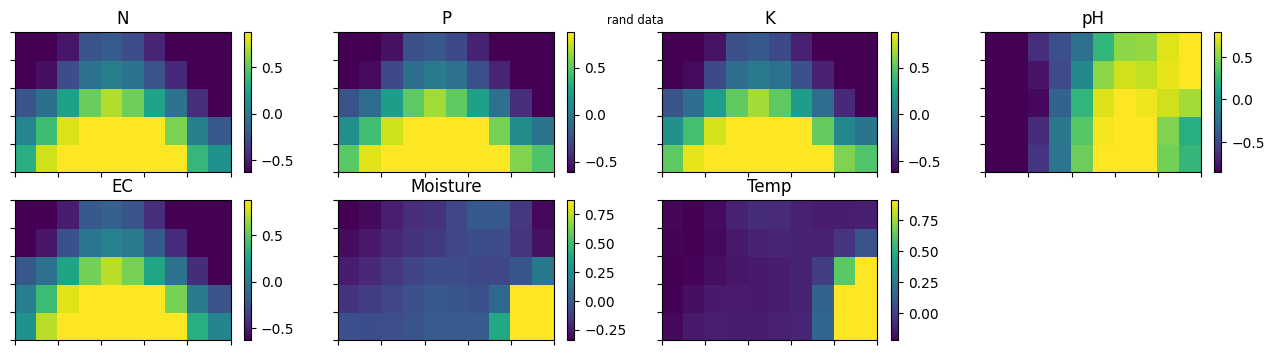

In [30]:
from sompy.visualization.mapview import View2D
from sompy.visualization.hitmap import HitMapView

# View2D Initialization
view2D  = View2D(10, 10, "rand data", text_size=10)
view2D.show(som, col_sz=4, which_dim="all", denormalize=True)

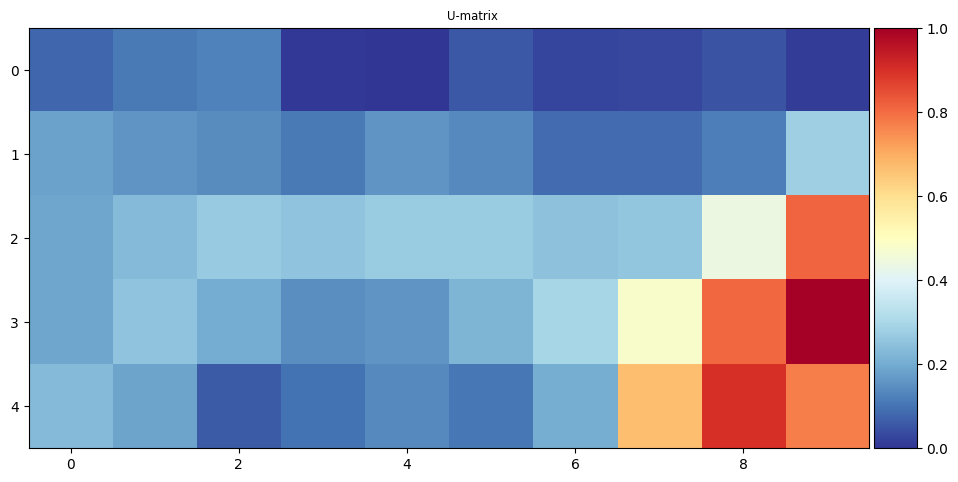

([],
 array([[0.55750809, 0.62212412, 0.64492764, 0.40506366, 0.39645012,
         0.50906889, 0.44879011, 0.45691137, 0.49308258, 0.42290977],
        [0.76476999, 0.71924377, 0.68553715, 0.62454099, 0.71943241,
         0.68273272, 0.57979885, 0.57430727, 0.64123684, 0.96883299],
        [0.78555282, 0.87434202, 0.94455241, 0.91214753, 0.95438206,
         0.95256419, 0.90011428, 0.91776093, 1.29758368, 2.05178177],
        [0.78448085, 0.91359907, 0.80437257, 0.69243638, 0.7217824 ,
         0.85088963, 1.00118088, 1.37932465, 2.04898715, 2.44240894],
        [0.87467926, 0.77639055, 0.52168778, 0.60334204, 0.6762469 ,
         0.61794137, 0.81450086, 1.76197678, 2.23849264, 1.97408852]]))

In [14]:
from sompy.visualization.umatrix import UMatrixView

# UMatrixView Initialization
umat  = UMatrixView(10, 10, "U-matrix", text_size=10)
umat.show(som)

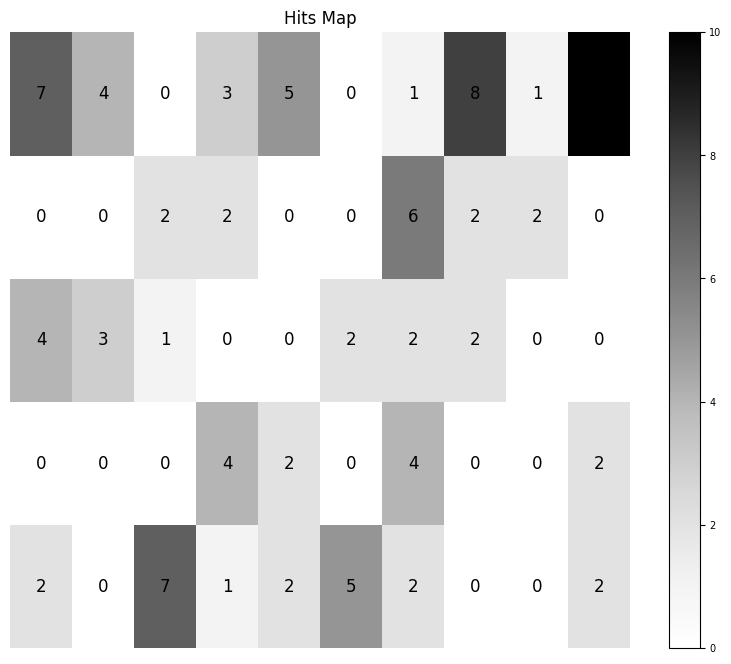

In [15]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\scikit_learn-1.3.2-py3.9-win-amd64.egg\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


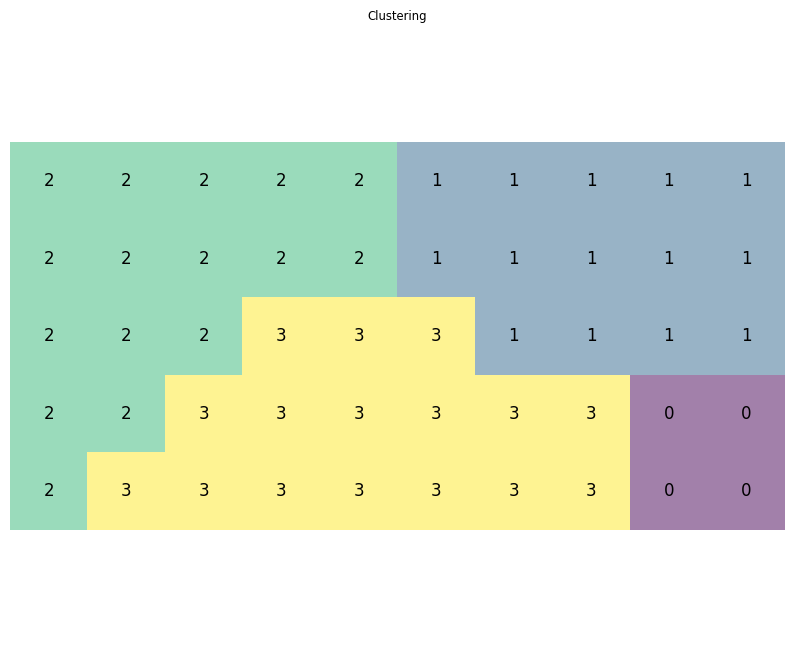

In [16]:
from sompy.visualization.hitmap import HitMapView
som.cluster(4)
hits  = HitMapView(10,15,"Clustering",text_size=7)
a=hits.show(som, labelsize=12)

In [19]:
som.cluster(4)

# Calculate BMU for each sample
bmus = som.find_bmu(data_normalized)[0]

# Convert BMU to integer
bmus = bmus.astype(int)

# Array size validation
max_bmu = np.max(bmus)
if max_bmu >= len(som.cluster_labels):
    print("Terjadi kesalahan: Indeks BMU melebihi jumlah label klaster.")
else:
    # Get cluster label based on BMU
    clusters = som.cluster_labels[bmus]

    # Show cluster information
    print("Label klaster untuk setiap sampel:")
    for i, cluster in enumerate(clusters):
        print(f"Sampel {i}: Klaster {cluster}")

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\scikit_learn-1.3.2-py3.9-win-amd64.egg\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Label klaster untuk setiap sampel:
Sampel 0: Klaster 3
Sampel 1: Klaster 3
Sampel 2: Klaster 3
Sampel 3: Klaster 3
Sampel 4: Klaster 3
Sampel 5: Klaster 3
Sampel 6: Klaster 1
Sampel 7: Klaster 3
Sampel 8: Klaster 1
Sampel 9: Klaster 1
Sampel 10: Klaster 1
Sampel 11: Klaster 1
Sampel 12: Klaster 3
Sampel 13: Klaster 1
Sampel 14: Klaster 1
Sampel 15: Klaster 3
Sampel 16: Klaster 3
Sampel 17: Klaster 0
Sampel 18: Klaster 0
Sampel 19: Klaster 2
Sampel 20: Klaster 2
Sampel 21: Klaster 1
Sampel 22: Klaster 3
Sampel 23: Klaster 3
Sampel 24: Klaster 3
Sampel 25: Klaster 3
Sampel 26: Klaster 1
Sampel 27: Klaster 3
Sampel 28: Klaster 1
Sampel 29: Klaster 1
Sampel 30: Klaster 1
Sampel 31: Klaster 0
Sampel 32: Klaster 3
Sampel 33: Klaster 1
Sampel 34: Klaster 1
Sampel 35: Klaster 3
Sampel 36: Klaster 3
Sampel 37: Klaster 1
Sampel 38: Klaster 1
Sampel 39: Klaster 1
Sampel 40: Klaster 1
Sampel 41: Klaster 1
Sampel 42: Klaster 1
Sampel 43: Klaster 1
Sampel 44: Klaster 1
Sampel 45: Klaster 1
Sampel 46

In [24]:
# Hitung BMU untuk setiap sampel
bmus = som.find_bmu(data_normalized)[0]

# Dapatkan label klaster berdasarkan BMU
clusters = som.cluster_labels[bmus.astype(int)]

# Calculate the number of samples in each cluster
cluster_counts = {i: np.sum(clusters == i) for i in range(4)}

# Show the number of samples in each cluster
for cluster_id, count in cluster_counts.items():
    print(f"Jumlah sampel di Klaster {cluster_id}: {count}")


Jumlah sampel di Klaster 0: 4
Jumlah sampel di Klaster 1: 34
Jumlah sampel di Klaster 2: 33
Jumlah sampel di Klaster 3: 29


In [21]:
import numpy as np

# Menghitung BMU untuk setiap sampel
bmus = som.find_bmu(data_normalized)[0]  # Mengembalikan index BMU untuk setiap sampel

# Show BMU
print("BMU untuk setiap sampel:")
for i, bmu in enumerate(bmus):
    print(f"Sampel {i}: BMU = {bmu}")

# Display the number of samples per BMU (BMU distribution)
unique_bmus, count_bmus = np.unique(bmus, return_counts=True)
print("\nJumlah sampel per BMU:")
for bmu, count in zip(unique_bmus, count_bmus):
    print(f"BMU {bmu}: {count} sampel")

BMU untuk setiap sampel:
Sampel 0: BMU = 33.0
Sampel 1: BMU = 45.0
Sampel 2: BMU = 34.0
Sampel 3: BMU = 25.0
Sampel 4: BMU = 36.0
Sampel 5: BMU = 44.0
Sampel 6: BMU = 16.0
Sampel 7: BMU = 45.0
Sampel 8: BMU = 17.0
Sampel 9: BMU = 18.0
Sampel 10: BMU = 26.0
Sampel 11: BMU = 27.0
Sampel 12: BMU = 36.0
Sampel 13: BMU = 16.0
Sampel 14: BMU = 16.0
Sampel 15: BMU = 45.0
Sampel 16: BMU = 46.0
Sampel 17: BMU = 49.0
Sampel 18: BMU = 49.0
Sampel 19: BMU = 40.0
Sampel 20: BMU = 40.0
Sampel 21: BMU = 27.0
Sampel 22: BMU = 34.0
Sampel 23: BMU = 25.0
Sampel 24: BMU = 36.0
Sampel 25: BMU = 44.0
Sampel 26: BMU = 16.0
Sampel 27: BMU = 45.0
Sampel 28: BMU = 17.0
Sampel 29: BMU = 18.0
Sampel 30: BMU = 26.0
Sampel 31: BMU = 39.0
Sampel 32: BMU = 36.0
Sampel 33: BMU = 16.0
Sampel 34: BMU = 16.0
Sampel 35: BMU = 45.0
Sampel 36: BMU = 46.0
Sampel 37: BMU = 7.0
Sampel 38: BMU = 7.0
Sampel 39: BMU = 8.0
Sampel 40: BMU = 7.0
Sampel 41: BMU = 7.0
Sampel 42: BMU = 7.0
Sampel 43: BMU = 7.0
Sampel 44: BMU = 6.0
Sam